In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob
from torchvision.utils import make_grid
from torchvision.io import read_image
from torchvision import transforms

In [2]:
def read_image(path):
    img = Image.open(path).convert('RGB').resize((224, 224), Image.ANTIALIAS)
    return transforms.ToTensor()(img)

In [3]:
# im = Image.fromarray(ndarr)
# im.save(f'reco_celeb_small.png')

In [4]:
base_path = '/media/osho/DATA/UniSiegen/Master_thesis/BFM/reconstruction-pipeline-pytorch3d-all-cam-params/supervised-cuke/outputs-images-masked/output-5k-40-80pc-20e-landmark-background_output-40k-5-80pc-20e-landmark-background/seperate-all-losses-80-pc-20-exp-0.00001-lr-0.5-train-mse-loss-5-cam-params'

In [5]:
best_ids = [28, 40, 2, 42, 0, 72, 76, 80] #94 96

In [6]:
worst_ids = [4, 18, 30, 36, 46, 48, 58, 90] #92 84 56 54 

In [7]:
good_ids = [6, 8, 14, 68, 24, 34, 96, 82] #0 68

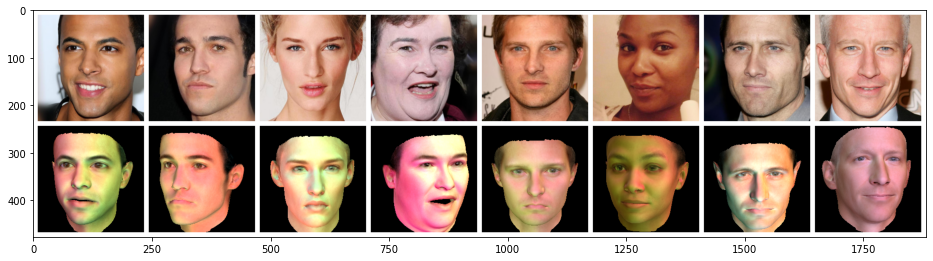

In [8]:
img = [f'{base_path}/face_{str(i)}.png' for i in best_ids]
rec_img = [i.replace('.png', '_r.png') for i in img]
imgs = img + rec_img
imgs = [read_image(i) for i in imgs]
grid = make_grid(imgs, nrow=8, padding=10, pad_value=1)
ndarr = grid.mul(255).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
plt.figure(figsize=(16, 16))
plt.imshow(ndarr)

In [9]:
# im = Image.fromarray(ndarr)
# im.save(f'images/reco_best.png')

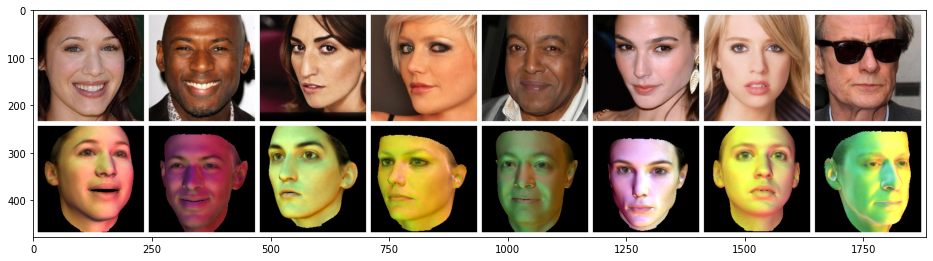

In [10]:
img = [f'{base_path}/face_{str(i)}.png' for i in good_ids]
rec_img = [i.replace('.png', '_r.png') for i in img]
imgs = img + rec_img
imgs = [read_image(i) for i in imgs]
grid = make_grid(imgs, nrow=8, padding=10, pad_value=1)
ndarr = grid.mul(255).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
plt.figure(figsize=(16, 16))
plt.imshow(ndarr)

In [11]:
# im = Image.fromarray(ndarr)
# im.save(f'images/reco_good.png')

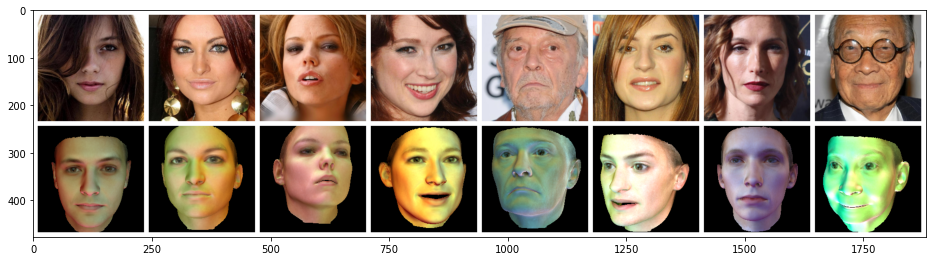

In [12]:
img = [f'{base_path}/face_{str(i)}.png' for i in worst_ids]
rec_img = [i.replace('.png', '_r.png') for i in img]
imgs = img + rec_img
imgs = [read_image(i) for i in imgs]
grid = make_grid(imgs, nrow=8, padding=10, pad_value=1)
ndarr = grid.mul(255).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
plt.figure(figsize=(16, 16))
plt.imshow(ndarr)

In [13]:
# im = Image.fromarray(ndarr)
# im.save(f'images/reco_bad.png')